# **Preprocessing Data**

#Import library
Pertama kita import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

# Import data arrhythmia yang digunakan


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Tubes PKB CLO3/arrhythmia.csv')

#Eksplorasi data

Data sebelum dilakukan pra pengolahan

In [4]:
print(data.head())
print(f"\nRows: {data.shape[0]}, Columns: {data.shape[1]}\n")

   age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0   75    0     190      80           91         193          371        174   
1   56    1     165      64           81         174          401        149   
2   54    0     172      95          138         163          386        185   
3   55    0     175      94          100         202          380        179   
4   75    0     190      80           88         181          360        177   

   Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  chV6_SwaveAmp  \
0        121  -16  ...            0.0            9.0           -0.9   
1         39   25  ...            0.0            8.5            0.0   
2        102   96  ...            0.0            9.5           -2.4   
3        143   28  ...            0.0           12.2           -2.2   
4        103  -16  ...            0.0           13.1           -3.6   

   chV6_RPwaveAmp  chV6_SPwaveAmp  chV6_PwaveAmp  chV6_TwaveAmp  chV6_QRSA  \
0             

Terdapat 452 baris isi data dan 280 kolom yang tersedia, namun kolom classes pada 279 adalah kesimpulan karena isinya adalah angka 1-16 yang merupakan kelas dari penyakit arryhtmia yang ingin diprediksi. Berikut adalah nama tiap kolom

In [5]:
column_names = ["age", "sex", "height", "weight", "qrs_duration", 'p-r_interval', 'q-t_interval', 't_interval', 'p_interval', 'qrs',
                't', 'p', 'qrst', 'j', 'heart_rate', 'q_wave', 'r_wave', 's_wave', "r'_wave", "s'_wave", 'number_of_intrinsic_deflections',
                'existence_of_ragged_r_wave', 'existence_of_diphasic_derivation_of_r_wave', 'existence_of_ragged_p_wave', 'existence_of_diphasic_derivation_of_p_wave',
                'existence_of_ragged_t_wave', 'existence_of_diphasic_derivation_of_t_wave', 'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii',
                'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii', 'channel_dii', 'channels_diii', 'channel_diii', 'channel_diii', 'channel_diii',
                'channel_diii', 'channel_diii', 'channel_diii', 'channel_diii', 'channel_diii', 'channel_diii', 'channel_diii', 'channel_diii', 'channel_avr', 'channel_avr',
                'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr', 'channel_avr' ,'channel_avl',
                'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl', 'channel_avl' ,
                'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf', 'channel_avf',
                'channel_avf', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1', 'channel_v1',
                'channel_v1' ,'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2', 'channel_v2',
                'channel_v2' ,'channel_v3','channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3', 'channel_v3',
                'channel_v3','channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4', 'channel_v4' ,
                'channel_v4','channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5', 'channel_v5' ,
                'channel_v5','channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6', 'channel_v6' ,
                'channel_v6', 'jj_wave', 'q_wave', 'r_wave', 's_wave', "r'_wave", "s'_wave", 'p_wave', 't_wave', 'qrsa', 'qrsta', 'of_channel_dii','of_channel_dii', 'of_channel_dii',
                'of_channel_dii', 'of_channel_dii', 'of_channel_dii', 'of_channel_dii', 'of_channel_dii', 'of_channel_dii', 'of_channel_dii' , 'of_channel_diii', 'of_channel_diii',
                'of_channel_diii', 'of_channel_diii', 'of_channel_diii', 'of_channel_diii', 'of_channel_diii', 'of_channel_diii', 'of_channel_diii', 'of_channel_diii','of_channel_avr',
                'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr', 'of_channel_avr' ,
                'of_channel_avl','of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl', 'of_channel_avl',
                'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf', 'of_channel_avf',
                'of_channel_v1','of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1', 'of_channel_v1' ,
                'of_channel_v2','of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2', 'of_channel_v2' ,
                'of_channel_v3','of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3', 'of_channel_v3' ,
                'of_channel_v4','of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4', 'of_channel_v4' ,
                'of_channel_v5','of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5', 'of_channel_v5' ,
                'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'of_channel_v6', 'classes']
data.columns = column_names

Data berisi ? diubah menjadi null

In [6]:
data = data.replace(['?'], np.NaN)

#CLEANING DATA

Karena kolom heart_rate seharusnya numeric, saya isi NaN dengan rata2nya dan ubah ke numerik

In [7]:
avg_data = data.dropna(subset = ["heart_rate"], axis = 0)
avg_data.reset_index(drop=True, inplace=True)
avg_data["heart_rate"] = avg_data["heart_rate"].astype(int)
avg = avg_data["heart_rate"].mean(axis=0)
data['heart_rate'] = data['heart_rate'].replace([np.NaN], avg)
data["heart_rate"] = data["heart_rate"].astype(int)

Kolom t, p, qrst, j adalah vector angle (derajat), maka saya isi dengan rata2 dan ubah ke numerik

In [8]:
avg_data = data.dropna(subset = ["t"], axis = 0)
avg_data.reset_index(drop=True, inplace=True)
avg_data["t"] = avg_data["t"].astype(int)
avg = avg_data["t"].mean(axis=0)
data['t'] = data['t'].replace([np.NaN], avg)
data["t"] = data["t"].astype(int)

avg_data = data.dropna(subset = ["p"], axis = 0)
avg_data.reset_index(drop=True, inplace=True)
avg_data["p"] = avg_data["p"].astype(int)
avg = avg_data["p"].mean(axis=0)
data['p'] = data['p'].replace([np.NaN], avg)
data["p"] = data["p"].astype(int)

avg_data = data.dropna(subset = ["qrst"], axis = 0)
avg_data.reset_index(drop=True, inplace=True)
avg_data["qrst"] = avg_data["qrst"].astype(int)
avg = avg_data["qrst"].mean(axis=0)
data['qrst'] = data['qrst'].replace([np.NaN], avg)
data["qrst"] = data["qrst"].astype(int)

avg_data = data.dropna(subset = ["j"], axis = 0)
avg_data.reset_index(drop=True, inplace=True)
avg_data["j"] = avg_data["j"].astype(int)
avg = avg_data["j"].mean(axis=0)
data['j'] = data['j'].replace([np.NaN], avg)
data["j"] = data["j"].astype(int)

Bisa dilihat data yang NaN sudah tidak ada

In [9]:
null = data.isnull().sum()
for i in range(len(data.columns)):
    if null[i] > 0:
        print(f"{data.columns[i]}: {null[i]} ({(null[i]/len(data))*100}%)")
total_cells = np.product(data.shape)
total_missing = null.sum()
print(f"Total missing values: {total_missing} ({(total_missing/total_cells) * 100}%)\n")

Total missing values: 0 (0.0%)



data pada "classes 1" terlalu banyak, namun sejauh ini sudah aman"


(452, 280)



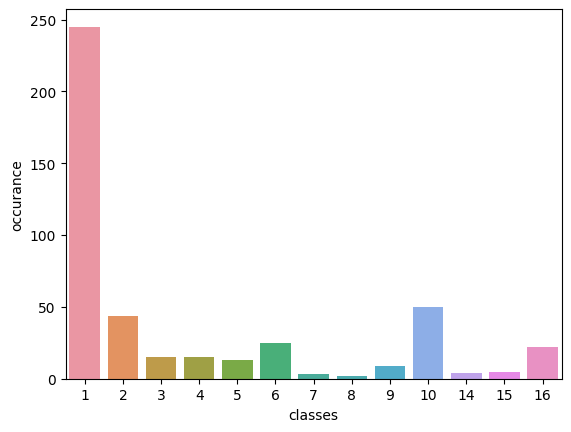

In [10]:
occur = data.groupby(["classes"]).size()
df_occur = pd.DataFrame({'classes':occur.index, 'occurance':occur.values})
sns.barplot(data=df_occur, x="classes", y="occurance")
print(f"\n{data.shape}\n")

Kita akan cek data umur, terlihat data umur cukup normal
sehingga tidak perlu diadakan pembersihan kode



(452, 280)



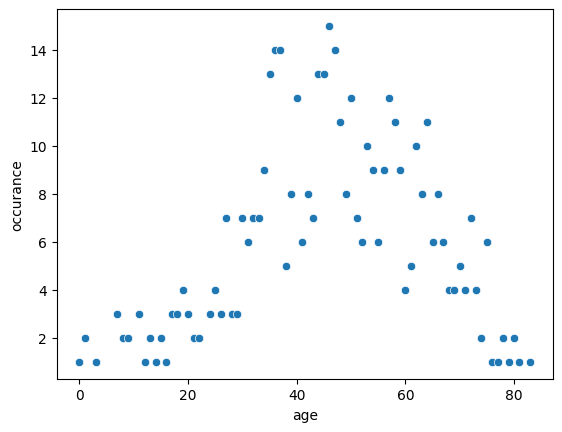

In [11]:
occur = data.groupby(["age"]).size()
df_occur = pd.DataFrame({'age':occur.index, 'occurance':occur.values})
sns.scatterplot(data=df_occur, x="age", y="occurance")
print(f"\n{data.shape}\n")

Pada sex, data yang ada adalah 0 dan 1. untuk kolom sex sudah aman


(452, 280)



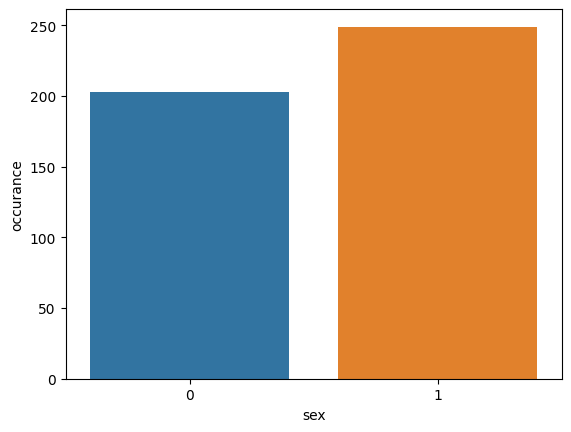

In [12]:
occur = data.groupby(["sex"]).size()
df_occur = pd.DataFrame({'sex':occur.index, 'occurance':occur.values})
sns.barplot(data=df_occur, x="sex", y="occurance")
print(f"\n{data.shape}\n")

Untuk data weight sudah cukup aman


(452, 280)



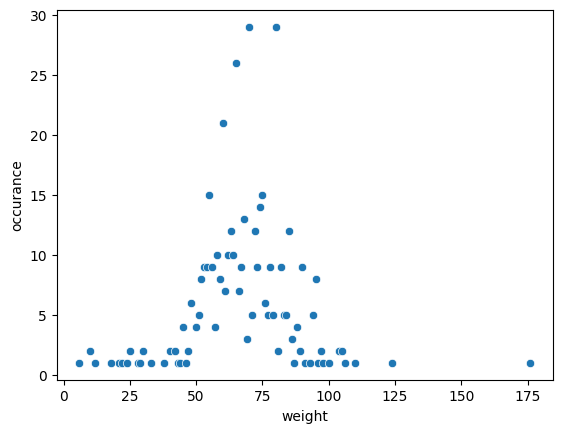

In [13]:
occur = data.groupby(["weight"]).size()
df_occur = pd.DataFrame({'weight':occur.index, 'occurance':occur.values})
sns.scatterplot(data=df_occur, x="weight", y="occurance")
print(f"\n{data.shape}\n")

Beberapa tinggi yang tidak masuk akal dibuang


(452, 280)



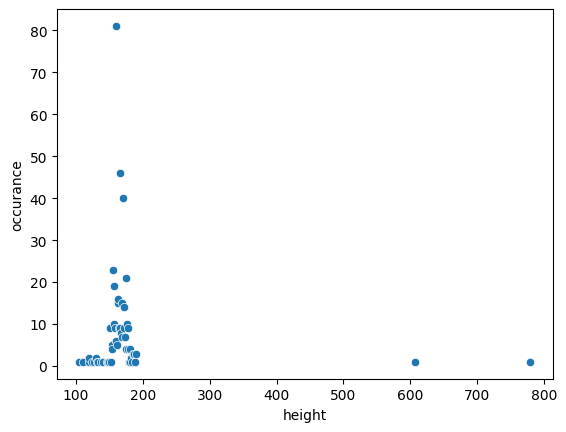

In [14]:
occur = data.groupby(["height"]).size()
df_occur = pd.DataFrame({'height':occur.index, 'occurance':occur.values})
sns.scatterplot(data=df_occur, x="height", y="occurance")
print(f"\n{data.shape}\n")

In [15]:
data = data[~data.isin([608]).any(axis=1)]
data = data[~data.isin([780]).any(axis=1)]


(450, 280)



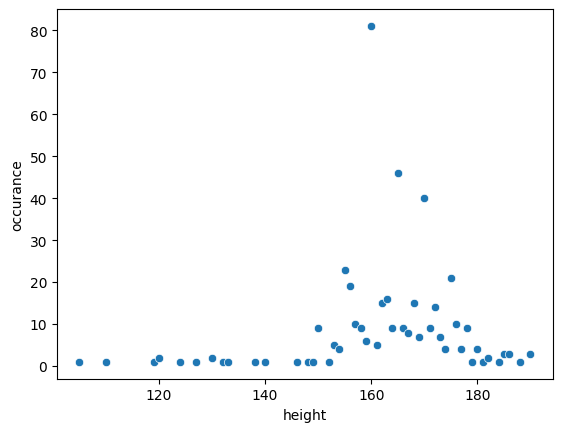

In [16]:
occur = data.groupby(["height"]).size()
df_occur = pd.DataFrame({'height':occur.index, 'occurance':occur.values})
sns.scatterplot(data=df_occur, x="height", y="occurance")
print(f"\n{data.shape}\n")

Data detak jantung terlihat normal


(450, 280)



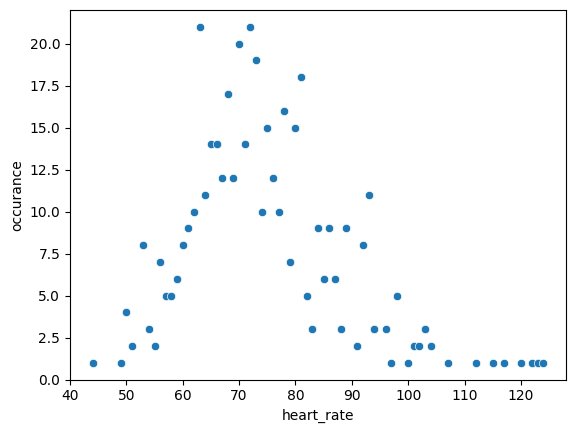

In [17]:
occur = data.groupby(["heart_rate"]).size()
df_occur = pd.DataFrame({'heart_rate':occur.index, 'occurance':occur.values})
sns.scatterplot(data=df_occur, x="heart_rate", y="occurance")
print(f"\n{data.shape}\n")

Data yang sudah di reproses tersebut kemudian disimpan ke csv untuk dilakukan pengujian

In [18]:
data.to_csv('dataBersih.csv')


Pre-proses data sudah selesai

#**Pemrosesan data (Training Data)**

#KNN

In [19]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('/content/dataBersih.csv')

In [21]:
data.head()

,Unnamed: 0,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,...,of_channel_v6.1,of_channel_v6.2,of_channel_v6.3,of_channel_v6.4,of_channel_v6.5,of_channel_v6.6,of_channel_v6.7,of_channel_v6.8,of_channel_v6.9,classes
0,0,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,1,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,2,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,3,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,4,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [22]:
data.describe()

,Unnamed: 0,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,...,of_channel_v6.1,of_channel_v6.2,of_channel_v6.3,of_channel_v6.4,of_channel_v6.5,of_channel_v6.6,of_channel_v6.7,of_channel_v6.8,of_channel_v6.9,classes
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000
mean,225.486667,46.675556,0.551111,163.842222,68.437778,88.942222,155.195556,367.797778,170.086667,90.035556,...,-0.278667,9.067111,-1.441333,0.004000,0.0,0.513111,1.220667,19.432222,29.588222,3.875556
std,130.785552,16.214228,0.497934,10.412195,16.132715,15.394913,44.918555,32.260307,35.644734,25.834294,...,0.549580,3.468655,1.992218,0.050229,0.0,0.346322,1.427738,13.430692,18.453662,4.416267
min,0.000000,1.000000,0.000000,105.000000,10.000000,55.000000,0.000000,240.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,112.250000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,...,-0.400000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.500000,17.725000,1.000000
50%,225.500000,47.000000,1.000000,164.000000,68.000000,86.500000,157.000000,367.500000,162.000000,91.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.150000,28.100000,1.000000
75%,338.750000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.875000,41.175000,6.000000
max,451.000000,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [23]:
#folding data
fold1 =(data.iloc[0:150].reset_index(drop=True), data.iloc[150:451].reset_index(drop=True))
fold2 =(data.iloc[150:300].reset_index(drop=True), pd.concat([data.iloc[0:150], data.iloc[300:451]]).reset_index(drop=True))
fold3 =(data.iloc[300:451].reset_index(drop=True), data.iloc[0:300].reset_index(drop=True))

test, train = fold2
print(train)

     Unnamed: 0  age  sex  height  weight  qrs_duration  p-r_interval  \
0             0   75    0     190      80            91           193   
1             1   56    1     165      64            81           174   
2             2   54    0     172      95           138           163   
3             3   55    0     175      94           100           202   
4             4   75    0     190      80            88           181   
..          ...  ...  ...     ...     ...           ...           ...   
295         447   53    1     160      70            80           199   
296         448   37    0     190      85           100           137   
297         449   36    0     166      68           108           176   
298         450   32    1     155      55            93           106   
299         451   78    1     160      70            79           127   

     q-t_interval  t_interval  p_interval  ...  of_channel_v6.1  \
0             371         174         121  ...          

In [24]:
# Normalizations
def norm(data):
  data = (data - data.min()) / (data.max() - data.min())
  return data

In [25]:
# Assign fitur dan kelas
X = data.drop('classes', axis=1)
y = data.classes

In [26]:
X = norm(X) # Melakukan normalisasi untuk data fitur
X

,Unnamed: 0,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,...,of_channel_v6,of_channel_v6.1,of_channel_v6.2,of_channel_v6.3,of_channel_v6.4,of_channel_v6.5,of_channel_v6.6,of_channel_v6.7,of_channel_v6.8,of_channel_v6.9
0,0.000000,0.902439,0.0,1.000000,0.421687,0.270677,0.368321,0.486989,0.241758,0.590244,...,0.638554,1.000000,0.381356,0.968531,0.0,NaN,0.53125,0.741667,0.507519,0.569579
1,0.002217,0.670732,1.0,0.705882,0.325301,0.195489,0.332061,0.598513,0.150183,0.190244,...,0.614458,1.000000,0.360169,1.000000,0.0,NaN,0.31250,0.675000,0.485714,0.500971
2,0.004435,0.646341,0.0,0.788235,0.512048,0.624060,0.311069,0.542751,0.282051,0.497561,...,0.783133,1.000000,0.402542,0.916084,0.0,NaN,0.34375,0.783333,0.424812,0.566990
3,0.006652,0.658537,0.0,0.823529,0.506024,0.338346,0.385496,0.520446,0.260073,0.697561,...,0.686747,1.000000,0.516949,0.923077,0.0,NaN,0.37500,0.716667,0.592481,0.648544
4,0.008869,0.902439,0.0,1.000000,0.421687,0.248120,0.345420,0.446097,0.252747,0.502439,...,0.626506,1.000000,0.555085,0.874126,0.0,NaN,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.991131,0.634146,1.0,0.647059,0.361446,0.187970,0.379771,0.527881,0.168498,0.570732,...,0.674699,1.000000,0.182203,0.825175,0.0,NaN,0.46875,0.550000,0.299248,0.246602
446,0.993348,0.439024,0.0,1.000000,0.451807,0.338346,0.261450,0.449814,0.340659,0.356098,...,0.614458,1.000000,0.661017,0.944056,0.0,NaN,0.37500,0.700000,0.618045,0.653722
447,0.995565,0.426829,0.0,0.717647,0.349398,0.398496,0.335878,0.464684,0.315018,0.565854,...,0.819277,1.000000,0.690678,0.000000,0.0,NaN,0.71875,0.583333,0.000000,0.034951
448,0.997783,0.378049,1.0,0.588235,0.271084,0.285714,0.202290,0.542751,0.402930,0.307317,...,0.698795,0.902439,0.508475,0.975524,0.0,NaN,0.40625,0.700000,0.520301,0.551456


In [27]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

euclidean(X.iloc[0], X.iloc[1])

2.3700817601695316

In [28]:
def knn(X_train, y_train, X_test, k):

  dist = []
  for row in range(X_train.shape[0]):
    dist.append(euclidean(X_train.iloc[row], X_test))

  data = X_train.copy()
  data['Dist'] = dist
  data['classes'] = y_train

  data = data.sort_values(by='Dist').reset_index(drop=True)

  y_pred = data.iloc[:k].classes.mode()

  return y_pred[0]

In [29]:
def evaluate(fold, k):
  test, train = fold

  X_train, y_train = train.drop('classes', axis=1), train.classes
  X_test, y_test = test.drop('classes', axis=1), test.classes

#normalisasi fitur di X
  X_train = norm(X_train)
  X_test = norm(X_test)

  y_preds = []

  for row in range(X_test.shape[0]):
    y_preds.append(knn(X_train, y_train, X_test.iloc[row], k))

  return (acc(y_preds, y_test))

In [30]:
def acc(y_pred, y_true):
  true = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true+=1
  return true/len(y_pred)

In [31]:
k = 5
accs = []
folds = [fold1,fold2,fold3]

for i in range(len(folds)):
  accs.append(evaluate(folds[i],k))

print(f'Menggunakan K: {k}, dengan rata-rata Akurasi : {sum(accs)/3}')

Menggunakan K: 5, dengan rata-rata Akurasi : 0.6088888888888889


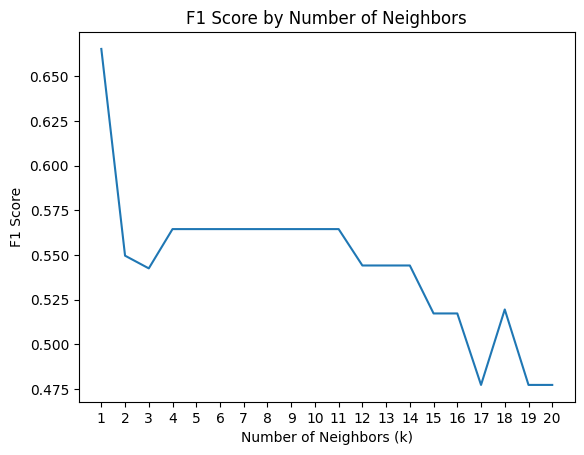

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, and y_test are already defined

k = []
f1 = []

for i in range(1, 21):  # Start from 1 instead of 0
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    knn_prediction = knn_model.predict(x_test)
    knn_f1 = f1_score(y_test, knn_prediction, average="weighted")
    k.append(i)
    f1.append(knn_f1)

default_x_ticks = range(len(k))
plt.plot(default_x_ticks, f1)
plt.xticks(default_x_ticks, k)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Number of Neighbors')
plt.show()


#NAIVE BAYES

Untuk pemroresan dengan Naive Bayes, kami menggunakan library sklearn. Setelah saya cocokan slide dengan dokumentasi sklearn, ternyata yang digunakkan adalah Gaussian. Pertama tama kita buat dulu modelnya dan fit dengan data training

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Seperti pada training data KNN, kita baca dulu file yang sudah diproses tadi dan pilih fitur dan target

In [34]:
df = pd.read_csv("/content/dataBersih.csv")
x = df.drop(["classes"], axis=1)
y = df["classes"]

Kemudian kita normalisasi data, kami menggunakan metode min max

In [35]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

Kemudian kita split datanya untuk training dan testing

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.1)

Selanjutnya kita akan buat dulu model gaussian Bayes nya dan fit dengan data training


In [37]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

Terakhir kita cek prediksinya dengan data testing dan tes akurasi, presisi, recall, dan f1

In [38]:
nb_prediction = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_prediction)
nb_precision = precision_score(y_test, nb_prediction, average="weighted")
nb_recall = recall_score(y_test, nb_prediction, average="weighted")
nb_f1 = f1_score(y_test, nb_prediction, average="weighted")
print(f"\nSkor akurasi bayes: {nb_accuracy}")
print(f"Skor Presisi bayes: {nb_precision}")
print(f"Skor recall bayes: {nb_recall}")
print(f"Skor f1 bayes: {nb_f1}")


Skor akurasi bayes: 0.15555555555555556
Skor Presisi bayes: 0.4964646464646464
Skor recall bayes: 0.15555555555555556
Skor f1 bayes: 0.15732377538829154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
